# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [8]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, plotting, calculate_non_specificity
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt


In [9]:
def display_results(models, true_labels):
    predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), models))
    # ARIs
    ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]
    # Non-specificity values of top 10
    top_NS = [calculate_non_specificity(model, verbose=False) for model in models]
    # Normalize mutual infor scores
    NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

    print(f"J values: {[x['crit'] for x in models]}")
    print(f"ARI values: {ari_list}")
    print(f"NS values: {top_NS}")
    print(f"NMI values: {NMIs}")
    
    # Plotting the model with the minimum J value
    ev_plot(models[0], X=X, cex=25)
    ev_pcaplot(data=X, x=models[0], normalize=False, cex=25)

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


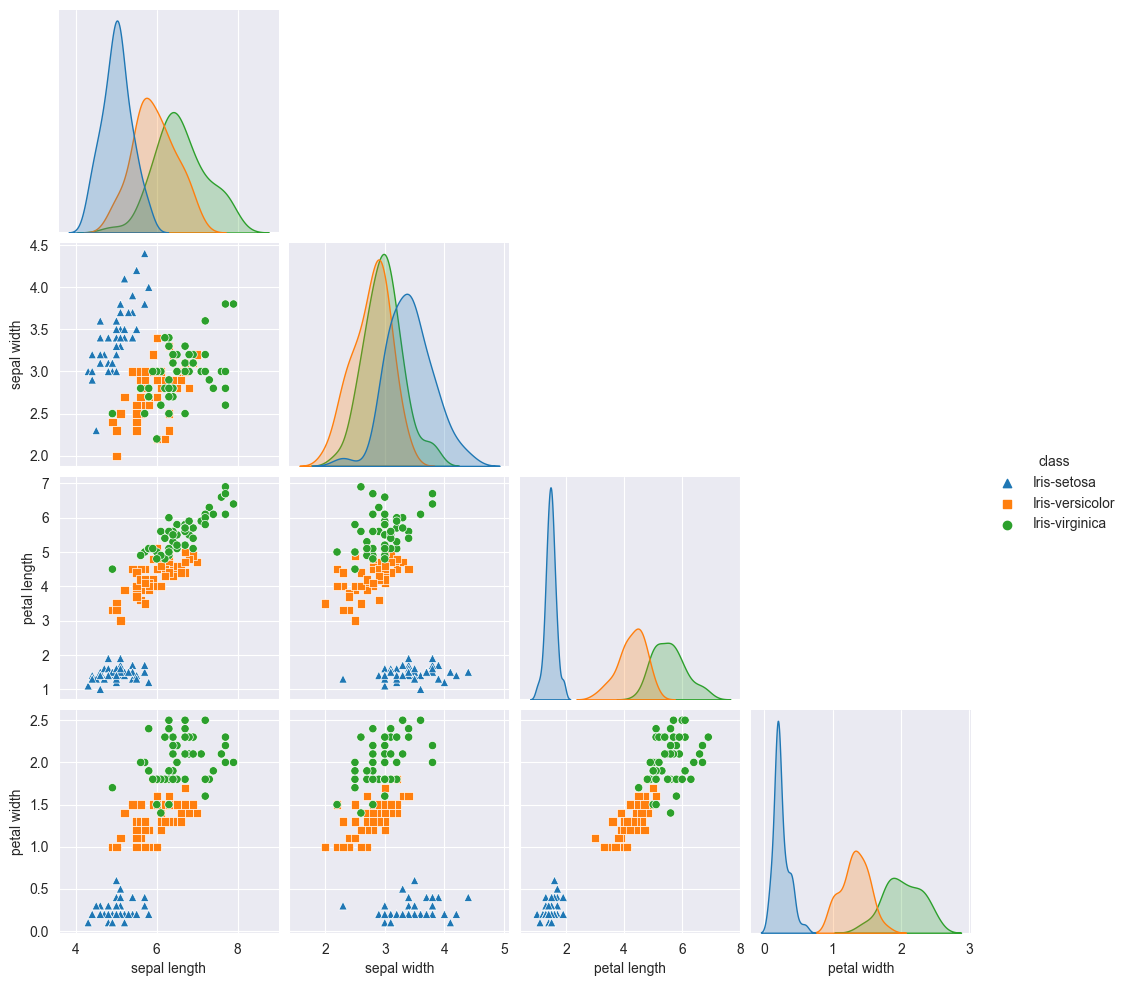

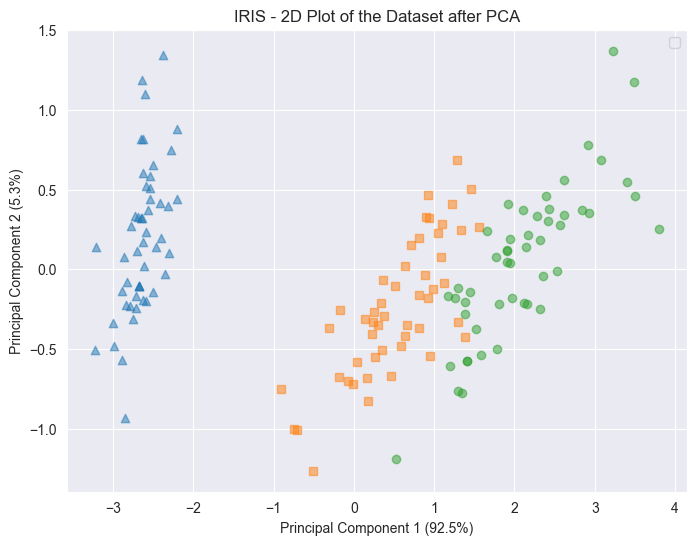

In [10]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="IRIS", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [11]:
# %%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=1, init="kmeans")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

[1, 3.54292165279678]
[2, 3.5079291690106413]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.500783480934679]
[4, 3.4978458161927035]
[5, 3.4961142655269937]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1, 3.54292165279678]
[2, 3.5079291690106413]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.4961142655269937]
[6, 3.4949799137722373]
[7, 3.494227794544927]
[1, 3.54292165279678]
[2, 3.5079291690106413]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1, 3.54292165279678]
[2, 3.5079291690106413]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1, 3.542921

J values: [3.4942277945449267, 3.494227794544927, 3.494227794544927, 3.494227794544927, 3.4942277945449276, 3.4942277945449276, 3.4942277945449276, 3.4942277945449276, 3.4942277945449276, 3.4942277945449276]
ARI values: [0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762, 0.6770802856430762]
NS values: [1.2593004548624587, 1.3355218480192184, 1.2912110321862036, 1.2912110321862036, 1.3014535932180389, 1.3345921539848007, 1.3014535932180389, 1.3014535932180389, 1.3014535932180389, 1.3014535932180389]
NMI values: [0.7037042596540185, 0.7037042596540185, 0.7037042596540183, 0.7037042596540183, 0.7037042596540184, 0.7037042596540183, 0.7037042596540184, 0.7037042596540184, 0.7037042596540184, 0.7037042596540184]


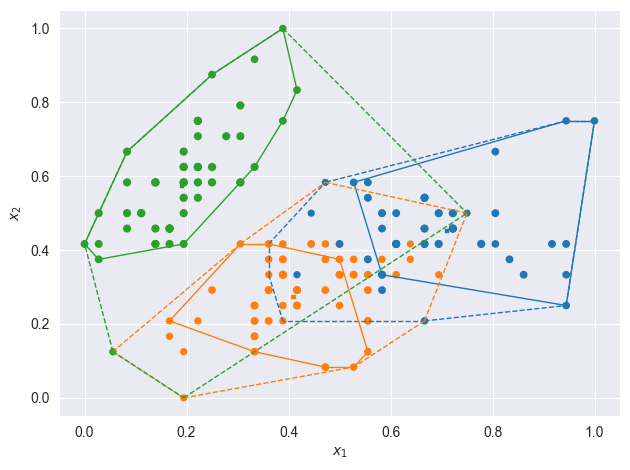

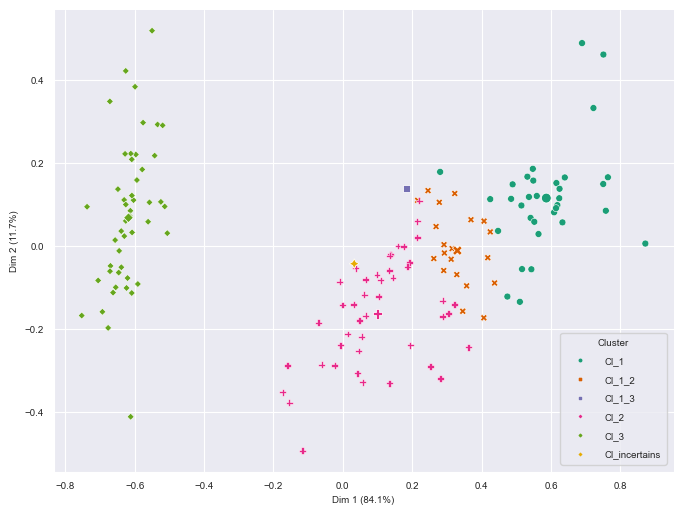

In [12]:
display_results(ecm_models, numeric_labels)

## Weighted ECM (WECM) with new equations of centers

In [13]:
# %%capture
# Weighted ECM clustering
wecm_models = np.array([])
c = 3
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

Initial weights: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Initial prototypes: 
 [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]
[1, 0.1979460864230703]
[2, 0.16310299343287177]
[3, 0.15433093063290393]
[4, 0.14801444269858763]
[5, 0.14235699331555374]
[6, 0.1360430687515327]
[7, 0.13000330090405113]
[8, 0.12536302040154823]
[9, 0.12042460922213913]
[10, 0.11744082039987919]
[11, 0.11642383938561468]
[12, 0.11543963003594385]
Initial weights: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Initial prototypes: 
 [[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]]
[1, 0.197

J values: [0.11543963003594346, 0.11543963003594347, 0.11543963003594347, 0.11543963003594385, 0.11543963003594404, 0.11543963003594408, 0.11543963003594408, 0.11543963003594408, 0.1154396300359443, 0.1154396300359443]
ARI values: [0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858, 0.7416919230031858]
NS values: [0.8837960475196954, 1.2290900569191354, 1.2290900569191354, 1.048625888429261, 1.1055218228726118, 1.167780713729355, 1.167780713729355, 1.167780713729355, 1.002001325152813, 1.002001325152813]
NMI values: [0.7449573670061777, 0.7449573670061775, 0.7449573670061775, 0.7449573670061775, 0.7449573670061777, 0.7449573670061777, 0.7449573670061777, 0.7449573670061777, 0.7449573670061777, 0.7449573670061777]


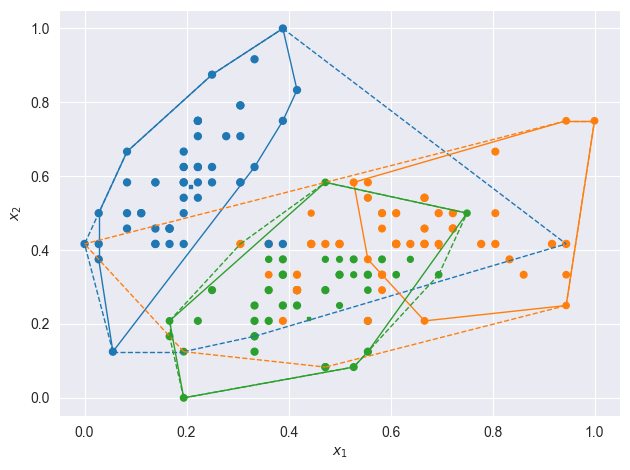

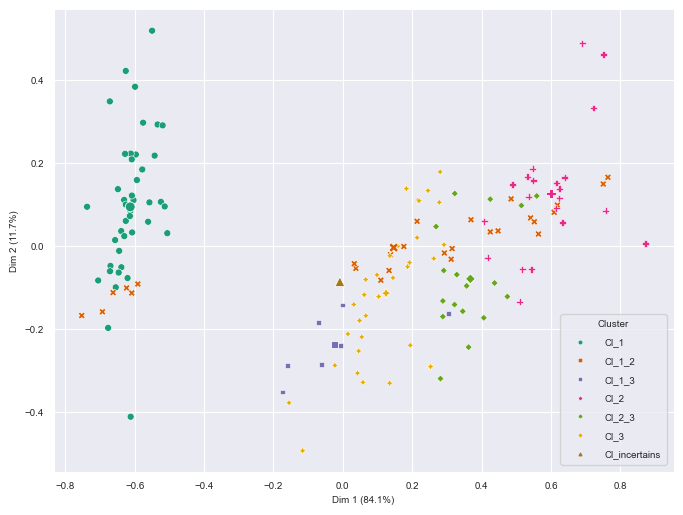

In [14]:
display_results(wecm_models, numeric_labels)

In [15]:
# top_weights = [model['W'] for model in wecm_models]
# for W in top_weights:
#     print(f"\n{W}")